# COURSE: PCA and multivariate neural signal processing
## SECTION: Creating and interpreting covariance matrices
### VIDEO: Python: covariance of simulated data
#### Instructor: sincxpress.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [19]:
## simulate data with covariance structure

# simulation parameters
N = 1000     # time points
M =   20     # channels
nTrials = 50 # number of trials

# time vector (radian units)
t = np.linspace(0,6*np.pi,N)

# initialize data matrices
data = np.zeros( [2,M,N,nTrials] )

# relationship across channels (imposing covariance)
chanrel = np.sin(np.linspace(0,2*np.pi,M))


# loop over "trials" and generate data
for triali in range(nTrials):
    
    # same phase on each trial
    data[0,:,:,triali] = np.outer(np.sin(t),chanrel).T + np.random.randn(M,N)
    
    # random phase on each trial
    shift = np.random.rand(1)*2*np.pi
    print(shift)
    data[1,:,:,triali] = np.outer(np.sin(t+shift),chanrel).T + np.random.randn(M,N)



[2.37715331]
[1.84680622]
[2.65982439]
[6.05327525]
[3.92118335]
[6.26356729]
[0.45705079]
[2.42012803]
[3.30698357]
[3.24063087]
[5.49208439]
[1.94144367]
[2.60783394]
[0.98896419]
[5.96625182]
[1.89671782]
[0.4120106]
[4.2662674]
[2.8737949]
[3.6355825]
[2.89814283]
[6.1220013]
[4.57872898]
[0.32337507]
[4.77906885]
[2.17453484]
[2.0396747]
[1.41283865]
[2.66690488]
[4.99370356]
[5.39103705]
[5.36107479]
[4.82811358]
[1.55724187]
[6.14802197]
[5.80590659]
[0.32631801]
[1.35253387]
[5.93864689]
[1.37929989]
[2.7128871]
[0.59684638]
[3.23868889]
[2.34228093]
[6.04723717]
[3.37867913]
[0.45520855]
[2.66022451]
[6.0271206]
[4.65575692]


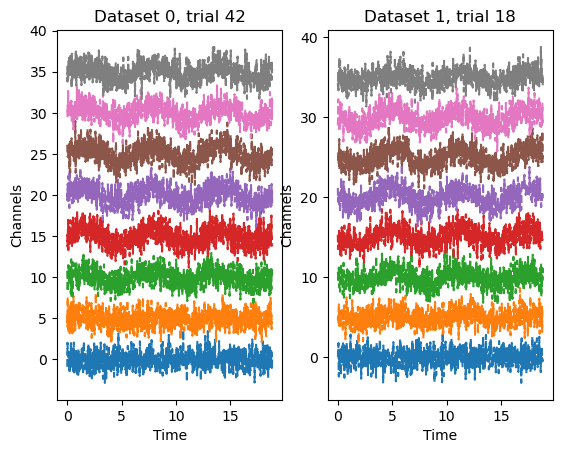

In [20]:
## visual inspection of the time series data

for i in range(2):
    
    plt.subplot(1,2,i+1)
    
    # pick a random trial
    trial2plot = np.random.randint(0,nTrials)
    
    # show the data
    for mi in range(8):
        plt.plot( t,data[i,mi,:,trial2plot]+5*mi,'--' )  #  bsxfun(@plus, squeeze(data{i}(:,:,trial2plot)) ,(1:M)'*3 ))
    
    plt.xlabel('Time')
    plt.ylabel('Channels')
    plt.title('Dataset %g, trial %g' %(i,trial2plot))


plt.show()

In [21]:
## compute covariance matrix element-wise

# initialize
covmat1 = np.zeros((M,M))

# compute the trial average (ERP)
dataave = np.mean(data[0,:,:,:],axis=2)

# double-loop over channels and compute dot product scaled by N-1
for chani in range(M):
    for chanj in range(M):
        
        # mean-center data
        subi = dataave[chani,:] - np.mean(dataave[chani,:])
        subj = dataave[chanj,:] - np.mean(dataave[chanj,:])
        
        # compute covariance
        covmat1[chani,chanj] = np.dot( subi,subj )        


In [22]:
## covariance via matrix multiplication

# first mean-center (over time!)
dataaveM = copy.deepcopy(dataave)
for i in range(M):
    dataaveM[i,:] = dataave[i,:] - np.mean(dataave[i,:])

# all pairwise dot products as the matrix times its transpose
covmat2 = dataaveM@dataaveM.T / (N-1)


In [23]:
## covariance using MATLAB's cov function

# note that cov will mean-center the data
covmat3 = np.cov(dataave)

# always check the size to make sure it's the correct orientation:
print(np.shape(covmat3))

(20, 20)


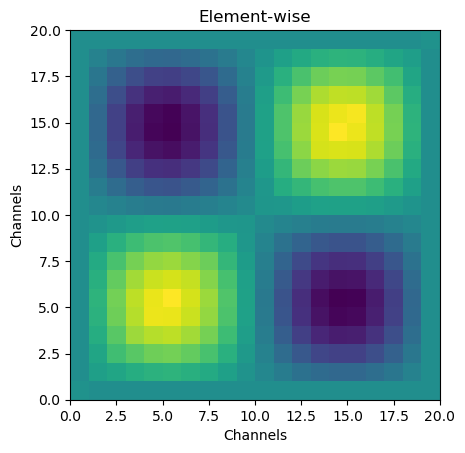

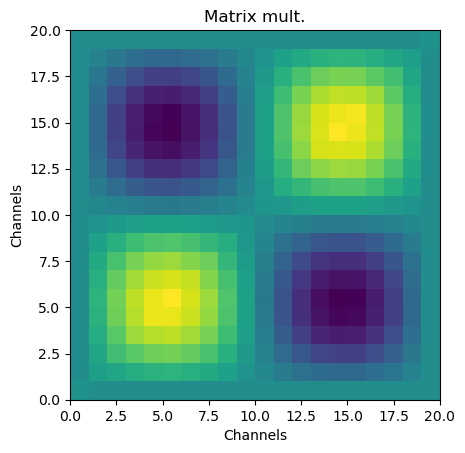

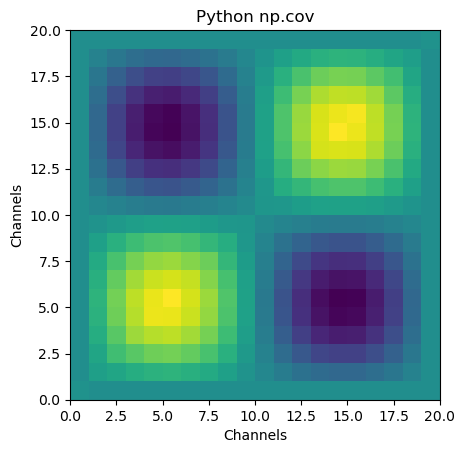

In [24]:
## show the matrices

plt.pcolormesh(covmat1)
plt.axis('square')
plt.title('Element-wise')
plt.xlabel('Channels')
plt.ylabel('Channels')
plt.show()


plt.pcolormesh(covmat2)
plt.axis('square')
plt.title('Matrix mult.')
plt.xlabel('Channels')
plt.ylabel('Channels')
plt.show()


plt.pcolormesh(covmat3)
plt.axis('square')
plt.title('Python np.cov')
plt.xlabel('Channels')
plt.ylabel('Channels')
plt.show()

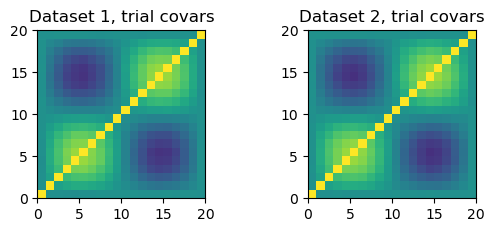

In [25]:
## compare the covariance matrices for the two datasets

covmat1 = np.zeros((M,M))
covmat2 = np.zeros((M,M))

for triali in range(nTrials):
    
    ## dataset 1
    # extract data and mean-center
    tmpdat = data[0,:,:,triali]
    for mi in range(M):
        tmpdat[mi,:] -= np.mean(tmpdat[mi,:])
    # compute covariance and add to matrix
    covmat1 = covmat1 + tmpdat@tmpdat.T / (N-1)
    
    ## dataset 2
    # extract data and mean-center
    tmpdat = data[1,:,:,triali]
    for mi in range(M):
        tmpdat[mi,:] -= np.mean(tmpdat[mi,:])
    # compute covariance and add to matrix
    covmat2 = covmat2 + tmpdat@tmpdat.T / (N-1)


# finish the averaging
covmat1 = covmat1 / nTrials
covmat2 = covmat2 / nTrials


# let's see those bad boys!
plt.subplot(221)
plt.pcolormesh(covmat1,vmin=-.7,vmax=.7)
plt.axis('square')
plt.title('Dataset 1, trial covars')

plt.subplot(222)
plt.pcolormesh(covmat2,vmin=-.7,vmax=.7)
plt.axis('square')
plt.title('Dataset 2, trial covars')

plt.show()

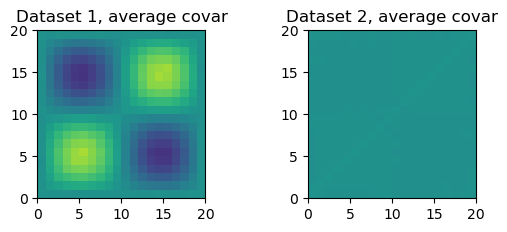

In [26]:
## now repeat for average

# compute average
dataave1 = np.mean(data[0,:,:,:],axis=2)
dataave2 = np.mean(data[1,:,:,:],axis=2)

# mean-center
for mi in range(M):
    dataave1[mi,:] -= np.mean(dataave1[mi,:])
    dataave2[mi,:] -= np.mean(dataave2[mi,:])

# covariance matrices
covmat1 = dataave1@dataave1.T / (N-1)
covmat2 = dataave2@dataave2.T / (N-1)



# let's see those bad boys!
plt.subplot(221)
plt.pcolormesh(covmat1,vmin=-.7,vmax=.7)
plt.axis('square')
plt.title('Dataset 1, average covar')

plt.subplot(222)
plt.pcolormesh(covmat2,vmin=-.7,vmax=.7)
plt.axis('square')
plt.title('Dataset 2, average covar')

plt.show()